In [35]:
import torch.utils
import torch.utils.data
import torch.utils.data.dataset
import torchvision
from torch.utils.data import TensorDataset
import torch
from utils.inputdata import InputData
import random
from utils.runner import BaseRunner
import torch.utils
import torch.utils.data
from models.som import SOM
import models.stm
from torch.utils.data import TensorDataset
import torch
import matplotlib.pyplot as plt
from utils.inputdata import InputData
import argparse
import wandb
import random
from abc import ABC, abstractmethod
from typing import Any
import importlib
importlib.reload(models.stm)
from models.stm import STM

class Config():
	"""Configuration class for setting constants."""
	M, N = 30, 10
	INPUT_DIM = (28,28)
	SEED = 13
	DECAY = 90 # good practice: decay about 90% of number of weights update
	SIGMA = 4
	BATCH_SIZE = 15
	EPOCHS_ONLINE = 1
	EPOCHS_SIMPLE_BATCH = 20
	EPOCHS_PYTORCH_BATCH = 1
	LLL_EPOCHS_PER_SUBSET = 1
	LLL_SUBSET_SIZE = 1
	LLL_DISJOINT = True
	LEARNING_RATE = 0.1

config_dict={key: value for key, value in Config.__dict__.items() if not key.startswith('_')}


class MnistRunner(BaseRunner):

	def __init__(self, config: object, dataset_name: str, input_data: InputData):
		super().__init__(config=config, dataset_name=dataset_name, input_data=input_data)
		
	def create_dataset(self):
		"""
		"""
		# data in .data and labels in .targets
		MNIST_train = torchvision.datasets.MNIST(
			root="C:\\Users\\loren\\Documenti\\Lorenzo\\CNR\\RepresentationLearning",
			train=True,
			download=True,
			transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(), self.input_data.transform_data]),
		)
		MNIST_val = torchvision.datasets.MNIST(
			root="C:\\Users\\loren\\Documenti\\Lorenzo\\CNR\\RepresentationLearning",
			train=False,
			download=True,
			transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(), self.input_data.transform_data]),
		)
		target_points={i: torch.Tensor([random.randint(0, self.config.M-1), random.randint(0, self.config.N-1)]) for i in range(10)}
		MNIST_train_subset= torch.utils.data.dataset.Subset(MNIST_train,[i for i in range(1000)])
		MNIST_train_subset.targets=MNIST_train.targets[0:1000]
		return MNIST_train_subset, MNIST_val, target_points



config=Config
random.seed(config.SEED)
input_data=InputData((28,28),1,"Unit")
mnist_runner=MnistRunner(config=config, dataset_name="MNIST", input_data=input_data)
dataset_train, dataset_val, target_points = mnist_runner.create_dataset()
stm = STM(mnist_runner.config.M, mnist_runner.config.N, mnist_runner.input_data, target_points=target_points, sigma= mnist_runner.config.SIGMA)


C:\Users\loren\AppData\Local\Temp\ipykernel_30248\3209788874.py:9: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  fig.canvas.get_width_height(),fig.canvas.tostring_rgb())


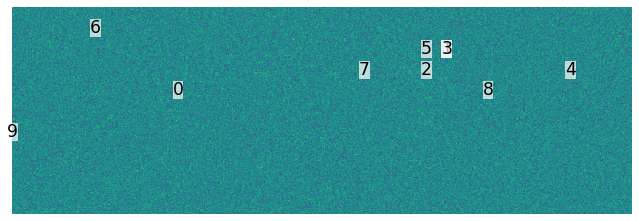

In [29]:
import PIL
import numpy as np

image_grid=stm.create_image_grid()
#plt.imshow(image_grid, cmap='gray', vmin=0, vmax=255) 
fig=stm.resize_image_add_target_points(image_grid)
fig.canvas.draw()
pil_image=PIL.Image.frombytes('RGB', 
	fig.canvas.get_width_height(),fig.canvas.tostring_rgb())


In [28]:
weights = stm.get_weights()
if stm.input_data.type=="int":
	image_grid = [[] for _ in range(stm.n)]
	locations = stm.get_locations()
	for i, loc in enumerate(locations):
		image_grid[loc[1]].append(weights[i].detach().numpy())
else:
	# rearrange weight in a matrix called image_grid
	image_grid=torch.cat([torch.cat([stm.input_data.inverse_transform_data(weights[i+(j*stm.n)]) for i in range(stm.n)], 0) for j in range(stm.m)], 1)
image_grid

tensor([[ 0.1115,  0.0281, -0.0754,  ..., -0.0346, -0.0499,  0.0056],
        [ 0.0653, -0.0395, -0.0159,  ...,  0.0232,  0.0020,  0.0315],
        [-0.0411,  0.0364, -0.0670,  ...,  0.0120,  0.0210,  0.0288],
        ...,
        [ 0.0324, -0.0693,  0.0372,  ...,  0.0116, -0.0080,  0.0336],
        [ 0.0875,  0.0610,  0.0580,  ...,  0.0272, -0.0447, -0.0253],
        [-0.0937,  0.0787,  0.0152,  ..., -0.0122,  0.0239, -0.0385]])

In [31]:

if True:
	if stm.input_data.channel_range=="RGB":
		image_grid= np.clip(image_grid, 0, 1)
	else:
		image_grid= np.int64(np.clip(image_grid*255, 0, 255))
		
image_grid= np.array(image_grid, float)
image_grid


array([[255., 255.,   0., ...,   0.,   0., 255.],
       [255.,   0.,   0., ..., 255., 131., 255.],
       [  0., 255.,   0., ..., 255., 255., 255.],
       ...,
       [255.,   0., 255., ..., 255.,   0., 255.],
       [255., 255., 255., ..., 255.,   0.,   0.],
       [  0., 255., 255., ...,   0., 255.,   0.]])

In [40]:
image_grid= np.load("array.npy")



1.0

In [ ]:

fig=stm.resize_image_add_target_points(image_grid)
fig.savefig('temp_image.png', format='png', bbox_inches='tight', pad_inches=0.1)

In [22]:
loaded_array.dtype

dtype('int64')